### Introduction

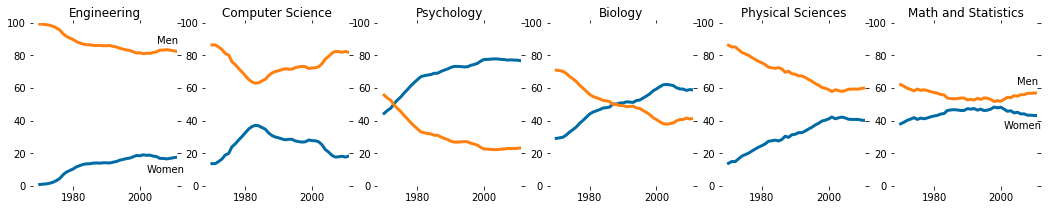

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Comparing across all degrees

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

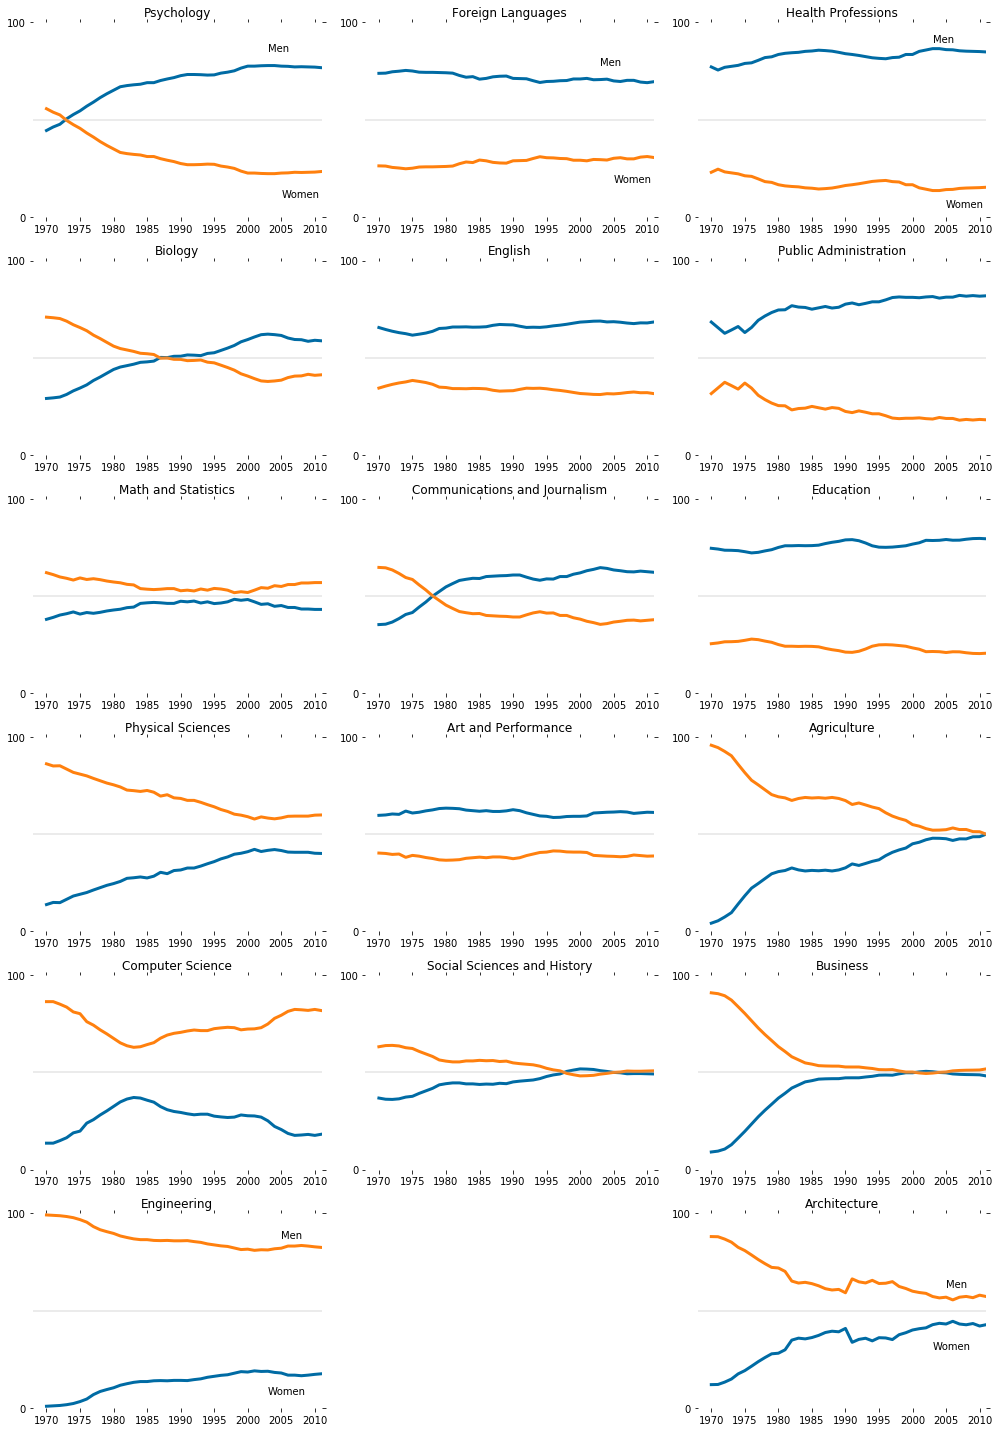

In [14]:
def setPlot(cat, sp):
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(cat)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    return ax

def setText(ax, cat_index, first_men, first_women, last_men = 0, last_women = 0):
    if cat_index == 0:
        ax.text(2003, first_men, 'Men')
        ax.text(2005, first_women, 'Women')
    elif cat_index == 5:
        ax.text(2005, last_men, 'Men')
        ax.text(2003, last_women, 'Women')

#### #### #### #### #### #### #### #### 

fig = plt.figure(figsize=(14, 20))

for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax1 = setPlot(stem_cats[cat_index], sp)
    setText(ax1, cat_index, 85, 10, 87, 7)
    
ax1.tick_params(labelbottom='on')
        
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax2 = setPlot(lib_arts_cats[cat_index], sp)
    setText(ax2, cat_index, 78, 18)
    
ax2.tick_params(labelbottom='on')
        
for sp in range(2,18,3):
    cat_index = int((sp-2)/3)
    ax3 = setPlot(other_cats[cat_index], sp)
    setText(ax3, cat_index, 90, 5, 62, 30)
    
ax3.tick_params(labelbottom='on')
        
fig.tight_layout()

plt.savefig('gender_degrees.png')

plt.show()

